<a href="https://colab.research.google.com/github/BelayAbAb/Project/blob/TASk-1-7-2-Final/Model_Building_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving creditcard.csv to creditcard.csv


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Train Accuracy  Test Accuracy  Train Precision  \
0     Logistic Regression        0.999254       0.999228         0.999202   
1           Random Forest        1.000000       0.999596         1.000000   
2  Support Vector Machine        0.998271       0.998280         0.996544   
3           Decision Tree        1.000000       0.999140         1.000000   

   Test Precision  Train Recall  Test Recall  Train F1 Score  Test F1 Score  
0        0.999174      0.999254     0.999228        0.999196       0.999184  
1        0.999583      1.000000     0.999596        1.000000       0.999582  
2        0.996562      0.998271     0.998280        0.997407       0.997420  
3        0.999135      1.000000     0.999140        1.000000       0.999138  


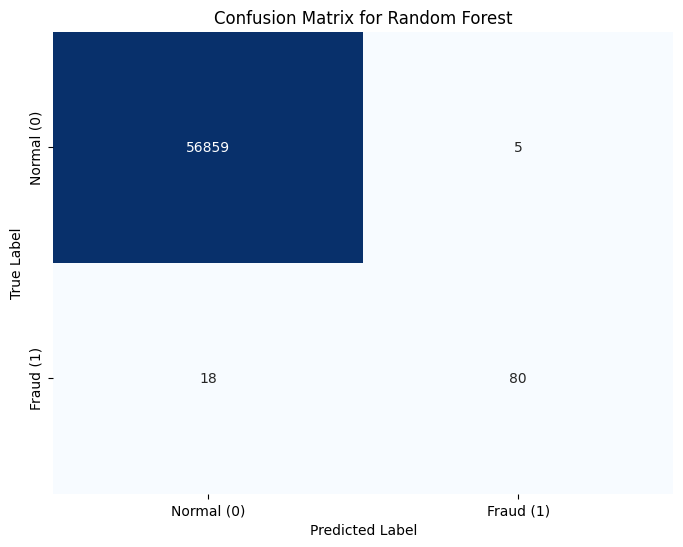


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Install any necessary libraries
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 1. Upload your dataset or mount Google Drive
from google.colab import files
uploaded = files.upload()  # This will allow you to upload files from your local machine

# If your dataset is in Google Drive, you can use the following lines instead
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/My Drive/path_to_your_dataset.csv')  # Update with your file path

# Load your dataset
df = pd.read_csv('creditcard.csv')  # Replace with your actual file name after uploading

# 2. Data Preparation
# Feature and target separation
X = df.drop(columns='Class')  # Replace 'Class' with the actual target variable name
y = df['Class']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Model Selection
# Define the models you want to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Initialize a list to store results
results = []

# Train each model and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on training data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)

    train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # Append results to the list
    results.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Test Precision': test_precision,
        'Train Recall': train_recall,
        'Test Recall': test_recall,
        'Train F1 Score': train_f1,
        'Test F1 Score': test_f1
    })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)

# Print the results DataFrame
print(results_df)

# 4. Model Evaluation on Best Model (Optional)
# Evaluate the best model (e.g., Random Forest) on the test set
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_test_pred_best = best_model.predict(X_test)

# Confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_test_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Fraud (1)'],
            yticklabels=['Normal (0)', 'Fraud (1)'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_random_forest.jpg')  # Save the confusion matrix as JPG
plt.show()

# Classification report for the best model
class_report = classification_report(y_test, y_test_pred_best)
print("\nClassification Report for Random Forest:")
print(class_report)

# Save classification report as text
with open('classification_report_random_forest.txt', 'w') as f:
    f.write(class_report)
